In [51]:
import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm
import scipy
from scipy.stats import *
import warnings
warnings.filterwarnings('ignore')

In [53]:
metadata = pd.read_excel('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/190215_Brain-ControlsOnly_Metadata_Merged.xlsx')
display(metadata.head())
display(metadata.shape)

,OldName,NewName,HarmonizedName,Bam,Contrast,Type,Group,Region,RegionMod,PatientID,...,xxx.CONTRIBUTING_NP_DX,xxx.Interval between death and last MMSE,xxx.ch_lastCasiScore,xxx.ch_lastCasiDate,xxx.micro_AmyloidAngiopathyOccipitalLobe_ID,xxx.GE_atherosclerosis_ID,xxx.calc_A,xxx.calc_B,xxx.C,xxx.CognitiveStatus
0,PD_00_38_CTRL_CAUD_X014_S01_L001_B1_T1_P025,PD_00_38_CTRL_CAUD_X014_S01_L001_B1_T1_P025,CTRL_CAUD_PD_00x38xx_X014_S01_L001_B1_T1_P025,/oak/stanford/groups/howchang/users/mcorces/PD...,CTRL_CAUD,CTRL,CTRL,CAUD,CAUD,00_38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PD_00_38_CTRL_CAUD_X014_S01_L002_B1_T2_P028,PD_00_38_CTRL_CAUD_X014_S01_L002_B1_T2_P028,CTRL_CAUD_PD_00x38xx_X014_S01_L002_B1_T2_P028,/oak/stanford/groups/howchang/users/mcorces/PD...,CTRL_CAUD,CTRL,CTRL,CAUD,CAUD,00_38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PD_00_38_CTRL_HIPP_X002_S11_L045_B1_T1_P002,PD_00_38_CTRL_HIPP_X002_S11_L045_B1_T1_P002,CTRL_HIPP_PD_00x38xx_X002_S11_L045_B1_T1_P002,/oak/stanford/groups/howchang/users/mcorces/PD...,CTRL_HIPP,CTRL,CTRL,HIPP,HIPP,00_38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PD_00_38_CTRL_HIPP_X002_S11_L046_B1_T2_P003,PD_00_38_CTRL_HIPP_X002_S11_L046_B1_T2_P003,CTRL_HIPP_PD_00x38xx_X002_S11_L046_B1_T2_P003,/oak/stanford/groups/howchang/users/mcorces/PD...,CTRL_HIPP,CTRL,CTRL,HIPP,HIPP,00_38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PD_00_38_CTRL_MDFG_X007_S04_L055_B1_T1_P014,PD_00_38_CTRL_MDFG_X007_S04_L055_B1_T1_P014,CTRL_MDFG_PD_00x38xx_X007_S04_L055_B1_T1_P014,/oak/stanford/groups/howchang/users/mcorces/PD...,CTRL_MDFG,CTRL,CTRL,MDFG,MDFG,00_38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(268, 108)

In [54]:
regions = list(metadata['Region'].unique())
with open('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/ctrl_bams.txt') as infile:
    ctrl_bams = infile.readlines()
multi_bam_regs = []
for reg in regions:
    print(reg)
    region_bams = []
    for bam in ctrl_bams:
        if reg in bam:
            region_bams.append(bam)
    if len(region_bams) > 0:
        multi_bam_regs.append(reg)

CAUD
HIPP
MDFG
MDTG
PTMN
SUNI
SMTG
PARL


In [55]:
for reg in multi_bam_regs:
    print(reg)
    ! cat /oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/rasqual/output/{reg}/chr*/rasqual_output.txt | sort -k11,11rn > /oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/rasqual/output/{reg}/all_{reg}_output.txt
    for i in range(10):
        ! cat /oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/rasqual/output/{reg}/chr*/rasqual_output_permutation_{i}.txt | sort -k11,11rn > /oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/rasqual/output/{reg}/all_{reg}_output_permutation_{i}.txt    
! cat /oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/rasqual/output/*/all_*_output.txt | sort -k11,11rn> /oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/rasqual/output/all_regions_output.txt
for i in range(10):
    ! cat /oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/rasqual/output/*/all_*_output_permutation_{i}.txt | sort -k11,11rn> /oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/rasqual/output/all_regions_output_permutation_{i}.txt

CAUD
HIPP
MDFG
MDTG
PTMN
SUNI
SMTG
PARL


In [71]:
for region in multi_bam_regs:
    print(region)
    region_output = pd.read_csv('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/rasqual/output/'
                                    + region + '/all_' + region + '_output.txt', sep='\t', header=None)
    region_output.columns = ['feature', 'rsid', 'chrom', 'snp_pos', 'ref', 'alt', 'allele_freq', 'HWE_chi_square_statistic',
                             'imputation_quality_score', 'log10_bh_qvalue', 'chi_square_statistic', 'effect_size', 'mapping_error_rate',
                            'ref_allele_mapping_bias', 'overdispersion', 'snp_id_within_region', 'num_feature_snps', 'num_testing_snps',
                            'num_iterations_null_hypothesis', 'null_iterations_alt_hypothesis', 'random_location_of_ties',
                             'log_likelihood_null_hypothesis', 'convergence_status', 'squared_correlation_fsnps', 'squared_correlation_rsnps']
    region_output = region_output.loc[region_output['rsid'] != 'SKIPPED']
    in_feature = []
    for ind,test in region_output.iterrows():
        start = int(test['feature'].split('_')[1])
        end = int(test['feature'].split('_')[2])
        if int(test['snp_pos']) >= start and int(test['snp_pos']) <= end:
            in_feature.append(True)
        else:
            in_feature.append(False)
    region_output['in_feature'] = in_feature
    region_output['region'] = [region for i in range(len(region_output))]
    region_output['raw_pvalue'] = region_output['chi_square_statistic'].map(lambda x : (1 - chi2.cdf(float(x), 1)))
    region_output['cis_window_qvalue'] = 10**region_output['log10_bh_qvalue']
    all_null_qvalue = []
    observed_lower = []
    null_lower = []
    fdr = []
    
    for i in range(10):
        region_permutation = pd.read_csv('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/rasqual/output/'
                                            + region + '/all_' + region + '_output_permutation_' + str(i) + '.txt', sep='\t', header=None)
        region_permutation.columns = ['feature', 'rsid', 'chrom', 'snp_pos', 'ref', 'alt', 'allele_freq', 'HWE_chi_square_statistic',
                                        'imputation_quality_score', 'log10_bh_qvalue', 'chi_square_statistic', 'effect_size', 'mapping_error_rate',
                                        'ref_allele_mapping_bias', 'overdispersion', 'snp_id_within_region', 'num_feature_snps', 'num_testing_snps',
                                        'num_iterations_null_hypothesis', 'null_iterations_alt_hypothesis', 'random_location_of_ties',
                                        'log_likelihood_null_hypothesis', 'convergence_status', 'squared_correlation_fsnps', 'squared_correlation_rsnps']
        region_permutation = region_permutation.loc[region_permutation['rsid'] != 'SKIPPED']
        region_permutation['raw_pvalue'] = region_permutation['chi_square_statistic'].map(lambda x : (1 - chi2.cdf(float(x), 1)))
        region_permutation['cis_window_qvalue'] = 10**region_permutation['log10_bh_qvalue']
        region_output['null_qvalue_'+str(i)] = region_permutation['cis_window_qvalue']
        all_null_qvalue += list(region_permutation['cis_window_qvalue'])
        
    region_output.sort_values(by='cis_window_qvalue', inplace=True)
    region_output['genomewide_bh_qvalue'] = sm.stats.multipletests(list(region_output['cis_window_qvalue']), method='fdr_bh', alpha=0.1)[1]
    observed_qvalue = list(region_output['cis_window_qvalue'])

    for index,row in region_output.iterrows():
        observed_proportion_lower = len([i for i in observed_qvalue if i < row['cis_window_qvalue']]) / len(observed_qvalue)
        null_proportion_lower = len([j for j in all_null_qvalue if j < row['cis_window_qvalue']]) / len(all_null_qvalue)
        observed_lower.append(observed_proportion_lower)
        null_lower.append(null_proportion_lower)
        if observed_proportion_lower == 0:
            fdr.append(0)
        else:
            fdr.append(null_proportion_lower / observed_proportion_lower)
    region_output['observed_lower'] = observed_lower
    region_output['null_lower'] = null_lower
    region_output['fdr'] = fdr
    
    region_output.to_csv('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/rasqual/output/'
                            + region + '/final_' + region + '_output.txt', sep='\t', index=False)
    
    display(region_output.head())
    display(region_output.shape)

CAUD


,feature,rsid,chrom,snp_pos,ref,alt,allele_freq,HWE_chi_square_statistic,imputation_quality_score,log10_bh_qvalue,...,null_qvalue_4,null_qvalue_5,null_qvalue_6,null_qvalue_7,null_qvalue_8,null_qvalue_9,genomewide_bh_qvalue,observed_lower,null_lower,fdr
0,chr17_78431572_78433595,rs7212019,chr17,78432472,G,A,0.171875,1.378426,1.0,-7.673398,...,0.001413,0.003339,0.005202,0.006603,0.003039,0.006917,0.000011,0.000000,0.0,0.0
3,chr17_78431572_78433595,rs11077365,chr17,78432412,C,A,0.937500,1.378426,1.0,-5.686070,...,0.042433,0.011584,0.023584,0.019160,0.010384,0.005100,0.000398,0.001927,0.0,0.0
1,chr17_45702992_45704386,rs17762308,chr17,45703582,T,C,0.359375,0.888889,1.0,-5.638462,...,0.001413,0.005051,0.016934,0.017749,0.017444,0.003511,0.000398,0.003854,0.0,0.0
2,chr17_45818390_45819780,rs62057109,chr17,45819271,T,C,0.218750,0.235102,1.0,-5.436042,...,0.007778,0.005051,0.016934,0.018872,0.017444,0.008083,0.000475,0.005780,0.0,0.0
5,chr17_78431572_78433595,rs692329,chr17,78431841,C,T,0.703125,2.492678,1.0,-5.167449,...,0.019054,0.051613,0.011584,0.030097,0.036914,0.014141,0.000664,0.007707,0.0,0.0


(519, 43)

HIPP


,feature,rsid,chrom,snp_pos,ref,alt,allele_freq,HWE_chi_square_statistic,imputation_quality_score,log10_bh_qvalue,...,null_qvalue_4,null_qvalue_5,null_qvalue_6,null_qvalue_7,null_qvalue_8,null_qvalue_9,genomewide_bh_qvalue,observed_lower,null_lower,fdr
0,chr17_78431572_78433595,rs7212019,chr17,78432472,G,A,0.181818,1.086420,1.0,-8.792368,...,0.001703,0.045494,0.015302,0.000987,0.002719,0.035654,8.500469e-07,0.000000,0.00000,0.000
1,chr17_78431572_78433595,rs691346,chr17,78433056,G,T,0.727273,3.414141,1.0,-5.049101,...,0.022759,0.010688,0.015302,0.001718,0.010649,0.012642,2.353315e-03,0.001898,0.00000,0.000
2,chr17_78431572_78433595,rs11077365,chr17,78432412,C,A,0.818182,1.086420,1.0,-4.347109,...,0.013299,0.067945,0.013278,0.008880,0.010649,0.012929,7.899158e-03,0.003795,0.00000,0.000
3,chr17_78431572_78433595,rs692329,chr17,78431841,C,T,0.750000,2.148438,1.0,-3.366332,...,0.015338,0.019631,0.014502,0.010557,0.010518,0.019228,5.667855e-02,0.005693,0.00000,0.000
4,chr7_65960407_65960696,rs62470932,chr7,65960530,C,T,0.340909,3.327160,1.0,-2.922870,...,0.032004,0.020112,0.018784,0.016133,0.007944,0.118053,1.258841e-01,0.007590,0.00019,0.025


(527, 43)

MDFG


,feature,rsid,chrom,snp_pos,ref,alt,allele_freq,HWE_chi_square_statistic,imputation_quality_score,log10_bh_qvalue,...,null_qvalue_4,null_qvalue_5,null_qvalue_6,null_qvalue_7,null_qvalue_8,null_qvalue_9,genomewide_bh_qvalue,observed_lower,null_lower,fdr
3,chr8_22599221_22600284,rs755934,chr8,22599692,T,G,0.375000,0.148148,1.0,-2.385009,...,0.008499,0.055728,0.016152,0.010710,0.015418,0.087028,0.190429,0.000000,0.000362,0.00
0,chr8_22622374_22623929,rs11780207,chr8,22623006,G,A,0.458333,2.958189,1.0,-2.352835,...,0.008499,0.041307,0.007656,0.001136,0.017070,0.005217,0.190429,0.001808,0.000362,0.20
1,chr17_45825137_45827395,rs62057154,chr17,45827244,C,T,0.333333,4.687500,1.0,-2.225874,...,0.008499,0.053647,0.008904,0.001460,0.008938,0.005217,0.190429,0.003617,0.000723,0.20
2,chr17_45825137_45827395,rs62057148,chr17,45826119,G,C,0.875000,7.647765,1.0,-2.225874,...,0.008499,0.055728,0.042309,0.016430,0.015418,0.006163,0.190429,0.003617,0.000723,0.20
18,chr11_86067972_86070115,rs2458500,chr11,86068268,A,G,0.833333,0.480000,1.0,-2.112704,...,0.017659,0.141405,0.246551,0.072704,0.080841,0.100575,0.190429,0.007233,0.001085,0.15


(553, 43)

MDTG


,feature,rsid,chrom,snp_pos,ref,alt,allele_freq,HWE_chi_square_statistic,imputation_quality_score,log10_bh_qvalue,...,null_qvalue_4,null_qvalue_5,null_qvalue_6,null_qvalue_7,null_qvalue_8,null_qvalue_9,genomewide_bh_qvalue,observed_lower,null_lower,fdr
0,chr11_60251518_60251763,rs636341,chr11,60251688,A,C,0.750000,2.958189,1.0,-4.614461,...,0.000657,0.011240,0.008827,0.012565,0.117975,0.014731,0.004054,0.000000,0.0,0.0
1,chr11_60251518_60251763,rs636317,chr11,60251677,C,T,0.750000,2.958189,1.0,-4.614461,...,0.008559,0.012060,0.073646,0.015391,0.034673,0.048398,0.004054,0.000000,0.0,0.0
2,chr17_78431572_78433595,rs7212019,chr17,78432472,G,A,0.166667,0.480000,1.0,-4.157169,...,0.008559,0.013801,0.073646,0.036671,0.035620,0.017743,0.004054,0.003817,0.0,0.0
3,chr17_78431572_78433595,rs691362,chr17,78432944,T,C,0.166667,0.480000,1.0,-4.157169,...,0.016173,0.063742,0.073646,0.020345,0.093942,0.021718,0.004054,0.003817,0.0,0.0
4,chr17_78431572_78433595,rs72907463,chr17,78432579,G,A,0.166667,0.480000,1.0,-4.157169,...,0.017738,0.063742,0.083223,0.021134,0.057345,0.021718,0.004054,0.003817,0.0,0.0


(524, 43)

PTMN


,feature,rsid,chrom,snp_pos,ref,alt,allele_freq,HWE_chi_square_statistic,imputation_quality_score,log10_bh_qvalue,...,null_qvalue_4,null_qvalue_5,null_qvalue_6,null_qvalue_7,null_qvalue_8,null_qvalue_9,genomewide_bh_qvalue,observed_lower,null_lower,fdr
0,chr11_60251518_60251763,rs636317,chr11,60251677,C,T,0.818182,2.272727,1.0,-4.343199,...,0.004491,0.019907,0.009036,0.044968,0.021096,0.010940,0.012513,0.000000,0.0,0.0
1,chr17_45825137_45827395,rs62057154,chr17,45827244,C,T,0.318182,1.517551,1.0,-3.997813,...,0.017164,0.030481,0.024716,0.034372,0.026538,0.021479,0.012513,0.002008,0.0,0.0
2,chr17_45825137_45827395,rs62057147,chr17,45825932,G,A,0.909091,3.227431,1.0,-3.997813,...,0.033393,0.035907,0.050849,0.219005,0.030221,0.057377,0.012513,0.002008,0.0,0.0
3,chr17_45825137_45827395,rs1912151,chr17,45825578,C,T,0.909091,3.227431,1.0,-3.997813,...,0.036959,0.046918,0.031535,0.219005,0.039101,0.056959,0.012513,0.002008,0.0,0.0
4,chr17_45639355_45639798,rs413778,chr17,45639519,A,G,0.727273,2.090072,1.0,-3.751973,...,0.053357,0.046918,0.039327,0.060519,0.040584,0.056959,0.017631,0.008032,0.0,0.0


(498, 43)

SUNI


,feature,rsid,chrom,snp_pos,ref,alt,allele_freq,HWE_chi_square_statistic,imputation_quality_score,log10_bh_qvalue,...,null_qvalue_4,null_qvalue_5,null_qvalue_6,null_qvalue_7,null_qvalue_8,null_qvalue_9,genomewide_bh_qvalue,observed_lower,null_lower,fdr
1,chr17_45894052_45896463,rs11575895,chr17,45894419,A,G,0.357143,0.062222,1.0,-2.561455,...,0.013750,0.011024,0.004406,0.029359,0.010208,0.004172,0.099234,0.0,0.000249,0.0
2,chr17_45894052_45896463,rs62056779,chr17,45894571,C,A,0.357143,0.062222,1.0,-2.561455,...,0.026052,0.013287,0.021227,0.031406,0.021728,0.010090,0.099234,0.0,0.000249,0.0
3,chr17_45894052_45896463,rs80233201,chr17,45894115,T,C,0.357143,0.062222,1.0,-2.561455,...,0.032757,0.013287,0.030634,0.034800,0.021728,0.013710,0.099234,0.0,0.000249,0.0
4,chr17_45894052_45896463,rs111972148,chr17,45895755,G,C,0.357143,0.062222,1.0,-2.561455,...,0.034134,0.013287,0.036583,0.035007,0.014994,0.013710,0.099234,0.0,0.000249,0.0
5,chr17_45894052_45896463,rs74548327,chr17,45895714,A,G,0.642857,0.884383,1.0,-2.561455,...,0.196195,0.022358,0.038639,0.035007,0.056738,0.039516,0.099234,0.0,0.000249,0.0


(401, 43)

SMTG


,feature,rsid,chrom,snp_pos,ref,alt,allele_freq,HWE_chi_square_statistic,imputation_quality_score,log10_bh_qvalue,...,null_qvalue_4,null_qvalue_5,null_qvalue_6,null_qvalue_7,null_qvalue_8,null_qvalue_9,genomewide_bh_qvalue,observed_lower,null_lower,fdr
4,chr11_60251518_60251763,rs636317,chr11,60251677,C,T,0.947368,0.120222,1.0,-2.646028,...,0.020549,0.013924,0.035647,0.048783,0.032048,0.019223,0.280309,0.000000,0.000402,0.00
0,chr17_45702992_45704386,rs17762308,chr17,45703582,T,C,0.342105,0.824653,1.0,-2.609435,...,0.009330,0.004997,0.007042,0.002256,0.015100,0.008472,0.280309,0.002008,0.000402,0.20
2,chr17_45702992_45704386,rs62056879,chr17,45704060,T,C,0.342105,0.824653,1.0,-2.609435,...,0.062236,0.010500,0.016374,0.007323,0.041433,0.014206,0.280309,0.002008,0.000402,0.20
3,chr17_45702992_45704386,rs968028,chr17,45703739,A,G,0.342105,0.824653,1.0,-2.609435,...,0.052865,0.010717,0.016374,0.013147,0.029483,0.027755,0.280309,0.002008,0.000402,0.20
1,chr17_45870069_45870629,rs56398500,chr17,45870122,A,G,0.342105,0.824653,1.0,-2.486283,...,0.009805,0.004997,0.008211,0.048783,0.053013,0.014206,0.280309,0.008032,0.000402,0.05


(498, 43)

PARL


,feature,rsid,chrom,snp_pos,ref,alt,allele_freq,HWE_chi_square_statistic,imputation_quality_score,log10_bh_qvalue,...,null_qvalue_4,null_qvalue_5,null_qvalue_6,null_qvalue_7,null_qvalue_8,null_qvalue_9,genomewide_bh_qvalue,observed_lower,null_lower,fdr
0,chr17_45825137_45827395,rs62057155,chr17,45827307,C,T,0.333333,1.655026,1.0,-2.621835,...,0.009693,0.002679,0.005525,0.000501,0.003990,0.000127,0.249884,0.000000,0.001976,0.00
1,chr17_45825137_45827395,rs62057154,chr17,45827244,C,T,0.333333,1.655026,1.0,-2.621835,...,0.045178,0.023923,0.005015,0.000528,0.014821,0.004291,0.249884,0.000000,0.001976,0.00
2,chr17_45825137_45827395,rs17763050,chr17,45825970,G,A,0.055556,0.062284,1.0,-2.621835,...,0.017333,0.015005,0.007173,0.001908,0.040906,0.004291,0.249884,0.000000,0.001976,0.00
3,chr17_45825137_45827395,rs62057148,chr17,45826119,G,C,0.055556,0.062284,1.0,-2.621835,...,0.017333,0.016206,0.011748,0.001950,0.030738,0.012888,0.249884,0.000000,0.001976,0.00
4,chr8_22599221_22600284,rs755934,chr8,22599692,T,G,0.305556,0.571478,1.0,-2.607441,...,0.013324,0.017873,0.023541,0.008268,0.187383,0.015597,0.249884,0.007905,0.001976,0.25


(506, 43)


CAUD



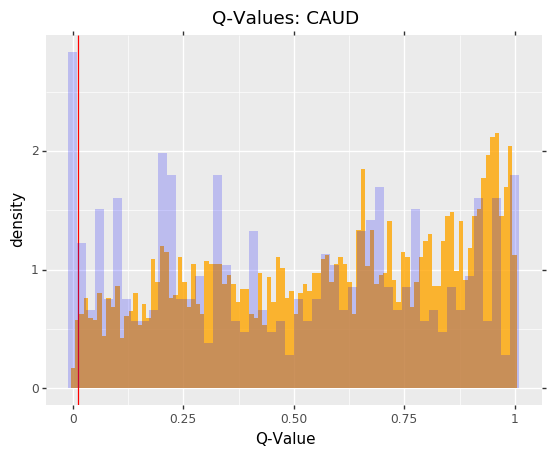

<ggplot: (-9223363310323443922)>


HIPP



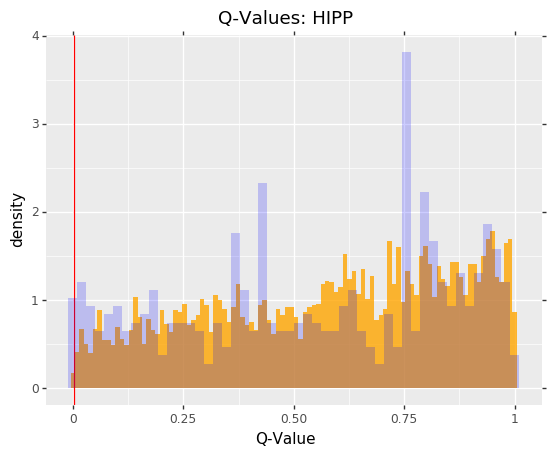

<ggplot: (8726531385664)>


MDFG



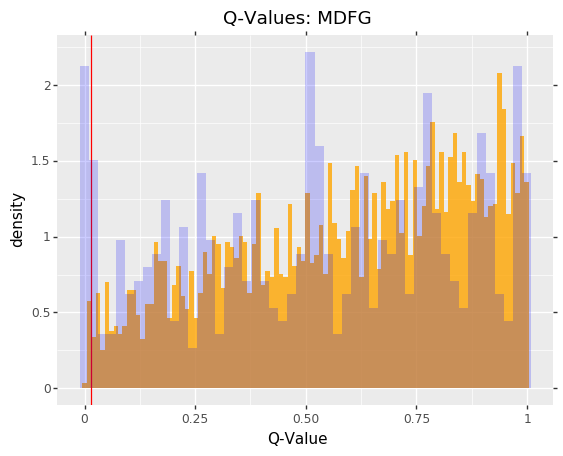

<ggplot: (-9223363310321020679)>


MDTG



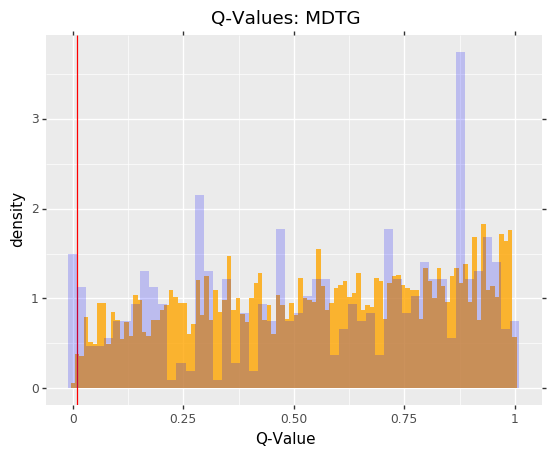

<ggplot: (-9223363310300118752)>


PTMN



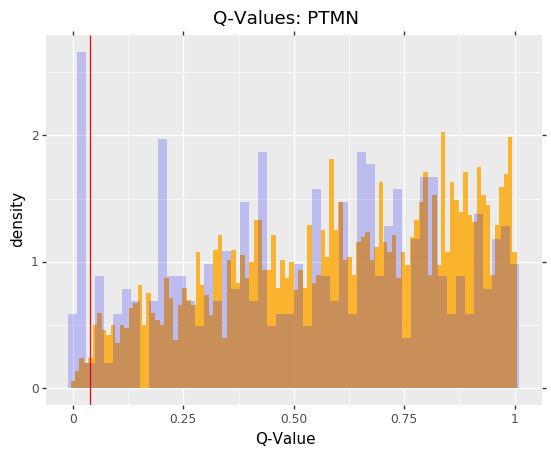

<ggplot: (8726518409918)>


SUNI



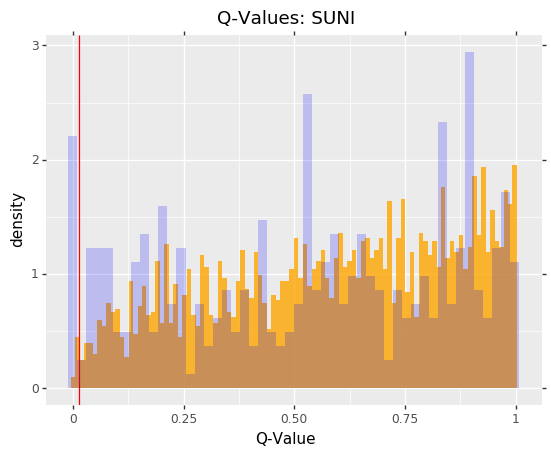

<ggplot: (-9223363310323253062)>


SMTG



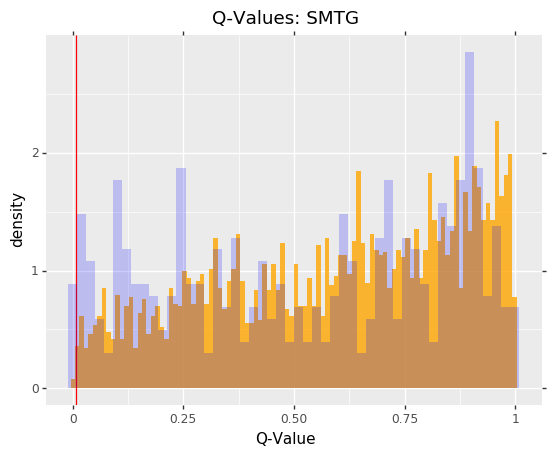

<ggplot: (8726557326635)>


PARL



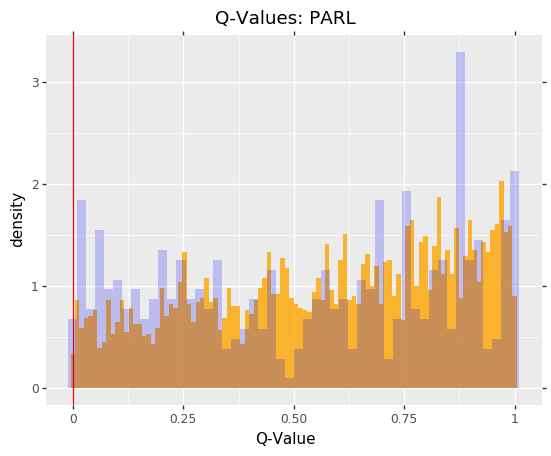

<ggplot: (8726515730973)>

In [76]:
for region in multi_bam_regs:
    print()
    print(region)
    print()
    region_output = pd.read_csv('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/rasqual/output/'
                                    + region + '/final_' + region + '_output.txt', sep='\t')
    observed_qvalue = list(region_output['cis_window_qvalue'])
    null_qvalue = []
    for i in range(10):
        null_qvalue += list(region_output['null_qvalue_'+str(i)])
        region_output.drop('null_qvalue_'+str(i), axis=1, inplace=True)
    fdr10_thresh = list(region_output['fdr10_threshold'])[0]
    region_output.to_csv('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/rasqual/output/'
                            + region + '/final_' + region + '_output_withFDR.txt', sep='\t', index=False)
    
    null_df = pd.DataFrame.from_dict({'null_qvalue':null_qvalue})

    display(ggplot()
            + geom_histogram(data=null_df, mapping=aes(x = 'null_qvalue', y='stat(density)'), fill='#ffa500', alpha=0.8, bins=100)
            + labs(title='Q-Values: ' + region, x='Q-Value')
            + geom_vline(data = region_output, mapping=aes(xintercept=fdr10_thresh), color='red')
            + geom_histogram(data=region_output, mapping=aes(x='cis_window_qvalue', y='stat(density)'), fill='#0000ff', alpha=0.2, bins=50))

In [77]:
with pd.ExcelWriter('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/rasqual/output/'
                    + 'rasqual_output.xlsx') as writer:
    for region in multi_bam_regs:
        print(region)
        region_output = pd.read_csv('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/rasqual/output/'
                                    + region + '/final_' + region + '_output_withFDR.txt', sep='\t')
        region_output.to_excel(writer, sheet_name=region, index=False)

CAUD
HIPP
MDFG
MDTG
PTMN
SUNI
SMTG
PARL


In [78]:
! cat /oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/rasqual/output/*/final_*_output_withFDR.txt | grep -v ^feature > /oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/rasqual/output/final_regions_output.txt

grep: warning: GREP_OPTIONS is deprecated; please use an alias or script


In [86]:
ryan_bias_snps = ['rs1237999','rs3755519','rs6781790','rs55682376','rs12119232','rs147889095',
                'rs3104768','rs58392387','rs17631303','rs17762308','rs56327054','rs12150223',
                'rs2532307','rs72914882','rs72914893','rs72914895','rs600834','rs600850','rs11077365',
                'rs72907463','rs691362','rs691346','rs691331','rs691328','rs691317','rs6501212',
                'rs76516995','rs10182292','rs744373','rs12493578']
in_original = []
in_original_sig = []
combined_output = pd.read_csv('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/rasqual/output/final_regions_output.txt', sep='\t', header=None)
display(combined_output.head())
combined_output.columns = ['feature', 'rsid', 'chrom', 'snp_pos', 'ref', 'alt', 'allele_freq', 'HWE_chi_square_statistic',
                             'imputation_quality_score', 'log10_bh_qvalue', 'chi_square_statistic', 'effect_size', 'mapping_error_rate',
                            'ref_allele_mapping_bias', 'overdispersion', 'snp_id_within_region', 'num_feature_snps', 'num_testing_snps',
                            'num_iterations_null_hypothesis', 'null_iterations_alt_hypothesis', 'random_location_of_ties',
                             'log_likelihood_null_hypothesis', 'convergence_status', 'squared_correlation_fsnps', 'squared_correlation_rsnps',
                              'in_feature', 'region', 'raw_pvalue', 'cis_window_qvalue', 'genomewide_bh_qvalue', 'observed_lower', 'null_lower', 'fdr',
                               'permutation_significant', 'fdr10_threshold']
combined_output.sort_values(by=['rsid','cis_window_qvalue'], inplace=True)
sig_snps = combined_output.loc[combined_output['permutation_significant'] == True]
for ind,val in combined_output.iterrows():
    if val['rsid'] in ryan_bias_snps:
        in_original.append(True)
    else:
        in_original.append(False)
combined_output['in_original'] = in_original

for ind,val in sig_snps.iterrows():
    if val['rsid'] in ryan_bias_snps:
        in_original_sig.append(True)
    else:
        in_original_sig.append(False)
sig_snps['in_original'] = in_original_sig
unique_sig_snps = sig_snps.drop_duplicates(subset='rsid')
unique_sig_snps.sort_values(by=['cis_window_qvalue'], inplace=True)
display('All Significant SNPs: ', sig_snps.shape)
display('Unique Significant SNPs: ', unique_sig_snps.shape)
sig_snps.to_csv('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/rasqual/output/rasqual_significant_snps.csv', sep='\t', index=False)
unique_sig_snps.to_csv('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/rasqual/output/unique_rasqual_significant_snps.csv', sep='\t', index=False)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,chr17_78431572_78433595,rs7212019,chr17,78432472,G,A,0.171875,1.378426,1,-7.673398,...,True,CAUD,3.535502e-09,2.121301e-08,0.000011,0.000000,0.0,0.0,True,0.011584
1,chr17_78431572_78433595,rs11077365,chr17,78432412,C,A,0.937500,1.378426,1,-5.686070,...,True,CAUD,6.867655e-07,2.060297e-06,0.000398,0.001927,0.0,0.0,True,0.011584
2,chr17_45702992_45704386,rs17762308,chr17,45703582,T,C,0.359375,0.888889,1,-5.638462,...,True,CAUD,4.597995e-07,2.298997e-06,0.000398,0.003854,0.0,0.0,True,0.011584
3,chr17_45818390_45819780,rs62057109,chr17,45819271,T,C,0.218750,0.235102,1,-5.436042,...,True,CAUD,6.106707e-07,3.664024e-06,0.000475,0.005780,0.0,0.0,True,0.011584
4,chr17_78431572_78433595,rs692329,chr17,78431841,C,T,0.703125,2.492678,1,-5.167449,...,True,CAUD,3.400333e-06,6.800666e-06,0.000664,0.007707,0.0,0.0,True,0.011584


'All Significant SNPs: '

(147, 36)

'Unique Significant SNPs: '

(85, 36)

In [97]:
idr_counts = pd.read_csv('/mnt/lab_data2/annashch/alzheimers_parkinsons/adpd.atac.idr.counts.txt.gz', sep='\t')
adpd_stage3 = pd.read_csv('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/snps_final/191121_ld_buddies_table_stage3.tsv', sep='\t')
display(adpd_stage3.head())
display(adpd_stage3.shape)

,chr,pos,r2_with_ld_tag,ld_tag_chr,ld_tag_pos,source_gwas,source,snp_id,locus_num,number_ld_buddies,...,nearest_atac_tissue_broad_tissue_regions,start_broad_tissue_regions,end_broad_tissue_regions,dist_broad_tissue_regions,direct_atac_overlap_single_cell,containing_atac_tissues_single_cell,nearest_atac_tissue_single_cell,start_single_cell,end_single_cell,dist_single_cell
0,10,102207833,0.805869,10,102255522,Nalls_23andMe,LD,10_102207833,1,9,...,ALLO,102225838,102226054,18005.0,False,none,microglia,102213693,102214072,5860.0
1,10,102245653,0.987490,10,102255522,Nalls_23andMe,LD,10_102245653,1,9,...,ALLO,102245836,102246040,183.0,True,"astrocytes,doublets,excitatory_neurons,inhibit...","astrocytes,doublets,excitatory_neurons,inhibit...",102244973,102245978,177.5
2,10,102250385,0.809348,10,102255522,Nalls_23andMe,LD,10_102250385,1,9,...,ALLO,102245836,102246040,4345.0,False,none,opcs,102247774,102248243,2142.0
3,10,102251214,0.809348,10,102255522,Nalls_23andMe,LD,10_102251214,1,9,...,ALLO,102245836,102246040,5174.0,False,none,opcs,102247774,102248243,2971.0
4,10,102255522,1.000000,10,102255522,Nalls_23andMe,Nalls-Chang,10_102255522,1,9,...,ALLO,102245836,102246040,9482.0,False,none,inhibitory_neurons,102255548,102256050,26.0


(13773, 38)

In [99]:
adpd_snps = pd.read_csv('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/snps_final/191121_ld_buddies_table_stage3.tsv', sep='\t')
display(adpd_snps.head())
display(adpd_snps.shape)
snps_bed = adpd_snps[['chr', 'pos']]
snps_bed['start'] = snps_bed['pos'] - 1
snps_bed = snps_bed[['chr', 'start', 'pos']]
snps_bed['chr'] = 'chr' + snps_bed['chr'].astype(str)
snps_bed.sort_values(by=['chr', 'start', 'pos'], inplace=True)
snps_bed.drop_duplicates(inplace=True)
snps_bed.to_csv('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/snps/hg38_snps.bed', sep='\t', index=False, header=False)
display(snps_bed.head())
display(snps_bed.shape)

,chr,pos,r2_with_ld_tag,ld_tag_chr,ld_tag_pos,source_gwas,source,snp_id,locus_num,number_ld_buddies,...,nearest_atac_tissue_broad_tissue_regions,start_broad_tissue_regions,end_broad_tissue_regions,dist_broad_tissue_regions,direct_atac_overlap_single_cell,containing_atac_tissues_single_cell,nearest_atac_tissue_single_cell,start_single_cell,end_single_cell,dist_single_cell
0,10,102207833,0.805869,10,102255522,Nalls_23andMe,LD,10_102207833,1,9,...,ALLO,102225838,102226054,18005.0,False,none,microglia,102213693,102214072,5860.0
1,10,102245653,0.987490,10,102255522,Nalls_23andMe,LD,10_102245653,1,9,...,ALLO,102245836,102246040,183.0,True,"astrocytes,doublets,excitatory_neurons,inhibit...","astrocytes,doublets,excitatory_neurons,inhibit...",102244973,102245978,177.5
2,10,102250385,0.809348,10,102255522,Nalls_23andMe,LD,10_102250385,1,9,...,ALLO,102245836,102246040,4345.0,False,none,opcs,102247774,102248243,2142.0
3,10,102251214,0.809348,10,102255522,Nalls_23andMe,LD,10_102251214,1,9,...,ALLO,102245836,102246040,5174.0,False,none,opcs,102247774,102248243,2971.0
4,10,102255522,1.000000,10,102255522,Nalls_23andMe,Nalls-Chang,10_102255522,1,9,...,ALLO,102245836,102246040,9482.0,False,none,inhibitory_neurons,102255548,102256050,26.0


(13773, 38)

,chr,start,pos
2334,chr1,39822150,39822151
2335,chr1,39822244,39822245
2336,chr1,39822259,39822260
2337,chr1,39822791,39822792
2338,chr1,39825224,39825225


(9707, 3)

In [88]:
trimmed_sig_snps = sig_snps[['feature', 'rsid', 'chrom', 'snp_pos', 'ref', 'alt', 'allele_freq',
                            'effect_size', 'mapping_error_rate', 'ref_allele_mapping_bias', 'overdispersion',
                            'snp_id_within_region', 'num_feature_snps', 'num_testing_snps',
                            'in_feature', 'region', 'raw_pvalue', 'cis_window_qvalue', 'genomewide_bh_qvalue',
                            'permutation_significant', 'fdr10_threshold', 'in_original']]
trimmed_adpd_stage3 = adpd_stage3[['rsid', 'r2_with_ld_tag', 'ld_tag_chr', 'ld_tag_pos', 'source_gwas', 'source',
                                    'locus_num', 'number_ld_buddies', 'ld_tag_locus', 'effect_allele', 'noneffect_allele', 'direction',
                                    'pvalue', 'has_coloc', 'direct_atac_overlap_narrow_tissue_regions',
                                    'containing_atac_tissues_narrow_tissue_regions',
                                    'nearest_atac_tissue_narrow_tissue_regions',
                                    'start_narrow_tissue_regions',
                                    'end_narrow_tissue_regions',
                                    'dist_narrow_tissue_regions',
                                    'direct_atac_overlap_broad_tissue_regions',
                                    'containing_atac_tissues_broad_tissue_regions',
                                    'nearest_atac_tissue_broad_tissue_regions',
                                    'start_broad_tissue_regions',
                                    'end_broad_tissue_regions',
                                    'dist_broad_tissue_regions',
                                    'direct_atac_overlap_single_cell',
                                    'containing_atac_tissues_single_cell',
                                    'nearest_atac_tissue_single_cell',
                                    'start_single_cell',
                                    'end_single_cell',
                                    'dist_single_cell']]
trimmed_adpd_stage3.drop_duplicates(inplace=True)
trim_sig_merge = trimmed_sig_snps.merge(trimmed_adpd_stage3, on='rsid')
trim_sig_merge.sort_values(by=['chrom', 'snp_pos', 'rsid', 'feature', 'region'], inplace=True)
display(trim_sig_merge.head())
display(trim_sig_merge.shape)

,feature,rsid,chrom,snp_pos,ref,alt,allele_freq,effect_size,mapping_error_rate,ref_allele_mapping_bias,...,nearest_atac_tissue_broad_tissue_regions,start_broad_tissue_regions,end_broad_tissue_regions,dist_broad_tissue_regions,direct_atac_overlap_single_cell,containing_atac_tissues_single_cell,nearest_atac_tissue_single_cell,start_single_cell,end_single_cell,dist_single_cell
0,chr1_232528515_232530038,rs10797576,chr1,232528865,C,T,0.281250,0.359946,0.000028,0.581322,...,STRI,232528568,232528768,97.0,True,"excitatory_neurons,inhibitory_neurons,neurons_...","excitatory_neurons,inhibitory_neurons,neurons_...",232528552,232529236,29.0
1,chr1_232528515_232530038,rs10797576,chr1,232528865,C,T,0.281250,0.359946,0.000028,0.581322,...,STRI,232528568,232528768,97.0,True,"excitatory_neurons,inhibitory_neurons,neurons_...","excitatory_neurons,inhibitory_neurons,neurons_...",232528552,232529236,29.0
106,chr11_60251518_60251763,rs636317,chr11,60251677,C,T,0.833333,0.387836,0.007736,0.491990,...,ISOC,60265062,60265262,13385.0,True,"excitatory_neurons,microglia","excitatory_neurons,microglia",60251481,60252738,432.5
107,chr11_60251518_60251763,rs636317,chr11,60251677,C,T,0.833333,0.387836,0.007736,0.491990,...,ISOC,60265062,60265262,13385.0,True,"excitatory_neurons,microglia","excitatory_neurons,microglia",60251481,60252738,432.5
108,chr11_60251518_60251763,rs636317,chr11,60251677,C,T,0.833333,0.387836,0.007736,0.491990,...,ISOC,60265062,60265262,13385.0,True,"excitatory_neurons,microglia","excitatory_neurons,microglia",60251481,60252738,432.5


(195, 53)

In [89]:
snp_dict = {}
for ind,val in trim_sig_merge.iterrows():
    if val['rsid'] in snp_dict:
        snp_dict[val['rsid']].append((val['source_gwas'],val['pvalue']))
    else:
        snp_dict[val['rsid']] = []
        snp_dict[val['rsid']].append((val['source_gwas'],val['pvalue']))
for snp in snp_dict:
    snp_dict[snp] = sorted(snp_dict[snp], key=lambda x: x[-1])
for ind,val in trim_sig_merge.iterrows():
    val['source_gwas'] = snp_dict[val['rsid']][0][0]
    val['pvalue'] = snp_dict[val['rsid']][0][1]
gwas_trim_sig_merge = trim_sig_merge.drop_duplicates(subset=['chrom', 'snp_pos', 'rsid', 'feature', 'region'])
display(gwas_trim_sig_merge.head())
display(gwas_trim_sig_merge.shape)
gwas_trim_sig_merge.to_csv('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/rasqual/output/gwas_rasqual_significant_snps.csv', sep='\t', index=False)
unique_gwas_trim_sig_merge = gwas_trim_sig_merge.sort_values(by=['rsid', 'cis_window_qvalue'])
unique_gwas_trim_sig_merge.drop_duplicates(subset='rsid', inplace=True)
unique_gwas_trim_sig_merge.to_csv('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/rasqual/output/unique_gwas_rasqual_significant_snps.csv', sep='\t', index=False)

,feature,rsid,chrom,snp_pos,ref,alt,allele_freq,effect_size,mapping_error_rate,ref_allele_mapping_bias,...,nearest_atac_tissue_broad_tissue_regions,start_broad_tissue_regions,end_broad_tissue_regions,dist_broad_tissue_regions,direct_atac_overlap_single_cell,containing_atac_tissues_single_cell,nearest_atac_tissue_single_cell,start_single_cell,end_single_cell,dist_single_cell
0,chr1_232528515_232530038,rs10797576,chr1,232528865,C,T,0.281250,0.359946,0.000028,0.581322,...,STRI,232528568,232528768,97.0,True,"excitatory_neurons,inhibitory_neurons,neurons_...","excitatory_neurons,inhibitory_neurons,neurons_...",232528552,232529236,29.0
106,chr11_60251518_60251763,rs636317,chr11,60251677,C,T,0.833333,0.387836,0.007736,0.491990,...,ISOC,60265062,60265262,13385.0,True,"excitatory_neurons,microglia","excitatory_neurons,microglia",60251481,60252738,432.5
94,chr11_60251518_60251763,rs636317,chr11,60251677,C,T,0.750000,0.287154,0.000079,0.377505,...,ISOC,60265062,60265262,13385.0,True,"excitatory_neurons,microglia","excitatory_neurons,microglia",60251481,60252738,432.5
97,chr11_60251518_60251763,rs636317,chr11,60251677,C,T,0.818182,0.251451,0.000382,0.482460,...,ISOC,60265062,60265262,13385.0,True,"excitatory_neurons,microglia","excitatory_neurons,microglia",60251481,60252738,432.5
100,chr11_60251518_60251763,rs636317,chr11,60251677,C,T,0.947368,0.349554,0.023827,0.454270,...,ISOC,60265062,60265262,13385.0,True,"excitatory_neurons,microglia","excitatory_neurons,microglia",60251481,60252738,432.5


(147, 53)

In [90]:
orig_sig_snps = pd.read_csv('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/snps/orig_sig_snps.tsv', sep='\t')
orig_sig_snps = orig_sig_snps[['rsid', 'ism_pval', 'delta_pval', 'explain_pval', 'confidence',
                              'motif', 'diff_motif', 'fc_track', 'pval_track', 'annotation', 'cluster']]
display(orig_sig_snps.head())
display(orig_sig_snps.shape)

,rsid,ism_pval,delta_pval,explain_pval,confidence,motif,diff_motif,fc_track,pval_track,annotation,cluster
0,rs2296887,0.021475,0.022689,0.125544,1,AACAGGCTCC,AACAGGC(T/C)CC,http://mitra.stanford.edu/kundaje/projects/alz...,http://mitra.stanford.edu/kundaje/projects/alz...,---,"1,2,4,11,"
1,rs7900536,0.029275,0.030456,0.191728,1,CCTCTAGAGGGATGATTCA,CCTCTAGAGGGATGATTC(A/C),http://mitra.stanford.edu/kundaje/projects/alz...,http://mitra.stanford.edu/kundaje/projects/alz...,---,"1,2,7,"
2,rs2856653,0.028402,0.028299,0.134918,1,TCTCCCACGG,TCTCCCA(C/T)GG,http://mitra.stanford.edu/kundaje/projects/alz...,http://mitra.stanford.edu/kundaje/projects/alz...,---,"2,"
3,rs11039225,0.046656,0.047686,0.999999,0,TGGAAGTCCT,TGGA(A/G)GTCCT,http://mitra.stanford.edu/kundaje/projects/alz...,http://mitra.stanford.edu/kundaje/projects/alz...,---,"19,"
4,rs636317,0.000131,0.000235,0.027467,2,TGCTGCCATCTGCTGGGAA,TGCTGC(C/T)ATCTGCTGGGAA,http://mitra.stanford.edu/kundaje/projects/alz...,http://mitra.stanford.edu/kundaje/projects/alz...,"MS4A4A, microglia specific","1,4,19,20,24,"


(123, 11)

In [91]:
orig_sig_merge = gwas_trim_sig_merge.merge(orig_sig_snps, on='rsid')
display(orig_sig_merge.head())
display(orig_sig_merge.shape)
orig_sig_merge.to_csv('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/rasqual/output/ml_gwas_rasqual_significant_snps.csv', sep='\t', index=False)
unique_orig_sig_merge = orig_sig_merge.sort_values(by=['rsid'])
unique_orig_sig_merge.drop_duplicates(subset='rsid', inplace=True)
unique_orig_sig_merge.sort_values(by=['confidence', 'feature'], ascending=False, inplace=True)
unique_orig_sig_merge.to_csv('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/rasqual/output/unique_ml_gwas_rasqual_significant_snps.csv', sep='\t', index=False)

,feature,rsid,chrom,snp_pos,ref,alt,allele_freq,effect_size,mapping_error_rate,ref_allele_mapping_bias,...,ism_pval,delta_pval,explain_pval,confidence,motif,diff_motif,fc_track,pval_track,annotation,cluster
0,chr11_60251518_60251763,rs636317,chr11,60251677,C,T,0.833333,0.387836,0.007736,0.491990,...,0.000131,0.000235,0.027467,2,TGCTGCCATCTGCTGGGAA,TGCTGC(C/T)ATCTGCTGGGAA,http://mitra.stanford.edu/kundaje/projects/alz...,http://mitra.stanford.edu/kundaje/projects/alz...,"MS4A4A, microglia specific","1,4,19,20,24,"
1,chr11_60251518_60251763,rs636317,chr11,60251677,C,T,0.750000,0.287154,0.000079,0.377505,...,0.000131,0.000235,0.027467,2,TGCTGCCATCTGCTGGGAA,TGCTGC(C/T)ATCTGCTGGGAA,http://mitra.stanford.edu/kundaje/projects/alz...,http://mitra.stanford.edu/kundaje/projects/alz...,"MS4A4A, microglia specific","1,4,19,20,24,"
2,chr11_60251518_60251763,rs636317,chr11,60251677,C,T,0.818182,0.251451,0.000382,0.482460,...,0.000131,0.000235,0.027467,2,TGCTGCCATCTGCTGGGAA,TGCTGC(C/T)ATCTGCTGGGAA,http://mitra.stanford.edu/kundaje/projects/alz...,http://mitra.stanford.edu/kundaje/projects/alz...,"MS4A4A, microglia specific","1,4,19,20,24,"
3,chr11_60251518_60251763,rs636317,chr11,60251677,C,T,0.947368,0.349554,0.023827,0.454270,...,0.000131,0.000235,0.027467,2,TGCTGCCATCTGCTGGGAA,TGCTGC(C/T)ATCTGCTGGGAA,http://mitra.stanford.edu/kundaje/projects/alz...,http://mitra.stanford.edu/kundaje/projects/alz...,"MS4A4A, microglia specific","1,4,19,20,24,"
4,chr11_60251518_60251763,rs636317,chr11,60251677,C,T,0.678571,0.318225,0.016438,0.425320,...,0.000131,0.000235,0.027467,2,TGCTGCCATCTGCTGGGAA,TGCTGC(C/T)ATCTGCTGGGAA,http://mitra.stanford.edu/kundaje/projects/alz...,http://mitra.stanford.edu/kundaje/projects/alz...,"MS4A4A, microglia specific","1,4,19,20,24,"


(31, 63)

In [92]:
display(unique_orig_sig_merge.head(10))
display(unique_orig_sig_merge.shape)

,feature,rsid,chrom,snp_pos,ref,alt,allele_freq,effect_size,mapping_error_rate,ref_allele_mapping_bias,...,ism_pval,delta_pval,explain_pval,confidence,motif,diff_motif,fc_track,pval_track,annotation,cluster
9,chr17_4901692_4902448,rs79436576,chr17,4901872,C,T,0.090909,0.673282,0.005003,0.514530,...,0.004616,0.004449,0.041519,2,TGGCCCCGCCCC,TGGCC(C/T)CGCCCC,http://mitra.stanford.edu/kundaje/projects/alz...,http://mitra.stanford.edu/kundaje/projects/alz...,Many possible linked genes. ARRB2 - arrestin B...,"6,11,13,14,15,19,20,21,22,24,"
12,chr17_45702992_45704386,rs968027,chr17,45703884,C,T,0.727273,0.599067,0.004908,0.413029,...,0.007962,0.008333,0.041340,2,TGACTAA,TGAC(T/C)AA,http://mitra.stanford.edu/kundaje/projects/alz...,http://mitra.stanford.edu/kundaje/projects/alz...,MAPT Locus,"2,"
6,chr11_86103106_86104633,rs1237999,chr11,86103988,G,A,0.703125,0.309731,0.000057,0.339363,...,0.001043,0.001603,0.006443,2,TATGAGTCACC,TAT(G/A)AGTCACC,http://mitra.stanford.edu/kundaje/projects/alz...,http://mitra.stanford.edu/kundaje/projects/alz...,"PICALM, oligo specific","1,3,7,13,18,19,20,21,22,23,"
0,chr11_60251518_60251763,rs636317,chr11,60251677,C,T,0.833333,0.387836,0.007736,0.491990,...,0.000131,0.000235,0.027467,2,TGCTGCCATCTGCTGGGAA,TGCTGC(C/T)ATCTGCTGGGAA,http://mitra.stanford.edu/kundaje/projects/alz...,http://mitra.stanford.edu/kundaje/projects/alz...,"MS4A4A, microglia specific","1,4,19,20,24,"
30,chr8_22599221_22600284,rs755934,chr8,22599692,T,G,0.714286,0.385599,0.000215,0.428795,...,0.043331,0.032394,0.092178,1,GCATTGGCCG,GCA(T/G)TGGCCG,http://mitra.stanford.edu/kundaje/projects/alz...,http://mitra.stanford.edu/kundaje/projects/alz...,---,"7,"
28,chr7_100217213_100217819,rs1727139,chr7,100217744,C,T,0.583333,0.346145,0.000634,0.436404,...,0.039411,0.038600,0.120150,1,GCGGAGAGAGAGAG,G(C/T)GGAGAGAGAGAG,http://mitra.stanford.edu/kundaje/projects/alz...,http://mitra.stanford.edu/kundaje/projects/alz...,---,"9,"
23,chr2_95323422_95324085,rs3755519,chr2,95323524,A,T,0.687500,0.388226,0.004923,0.435330,...,0.011536,0.014240,0.146132,1,AGTGCTCTCTG,(A/T)GTGCTCTCTG,http://mitra.stanford.edu/kundaje/projects/alz...,http://mitra.stanford.edu/kundaje/projects/alz...,---,"1,3,4,5,7,10,14,15,22,"
18,chr17_45914420_45914901,rs55682376,chr17,45914522,G,A,0.409091,0.650492,0.022457,0.515613,...,0.024947,0.026737,0.105026,1,AGGCAGATACTGTGTACTGTCCTCT,AGGCAG(A/G)TACTGTGTACTGTCCTCT,http://mitra.stanford.edu/kundaje/projects/alz...,http://mitra.stanford.edu/kundaje/projects/alz...,---,"19,"
14,chr17_45894052_45896463,rs76594404,chr17,45894091,G,C,0.375000,0.670849,0.014251,0.234107,...,0.043292,0.045749,0.081452,1,CGCCCACGTG,CG(C/G)CCACGTG,http://mitra.stanford.edu/kundaje/projects/alz...,http://mitra.stanford.edu/kundaje/projects/alz...,---,"2,"
13,chr17_45783544_45785590,rs62057073,chr17,45783751,C,T,0.727273,0.393093,0.022431,0.500157,...,0.047150,0.046331,0.059129,1,GCTCCTCCTAG,GCTCCTC(C/T)TAG,http://mitra.stanford.edu/kundaje/projects/alz...,http://mitra.stanford.edu/kundaje/projects/alz...,---,"21,"


(15, 63)

In [93]:
gwas_trim_sig_merge['feature'].value_counts()

chr17_78431572_78433595     39
chr17_45894052_45896463     24
chr17_45702992_45704386     12
chr17_45825137_45827395      8
chr11_60251518_60251763      7
chr17_45818390_45819780      6
chr5_102971168_102972471     6
chr11_86067972_86070115      4
chr11_86103106_86104633      4
chr17_4901692_4902448        3
chr17_45585766_45586646      3
chr4_89834926_89835137       2
chr8_22622374_22623929       2
chr8_22599221_22600284       2
chr4_875302_876377           2
chr17_45740360_45742185      2
chr2_95323422_95324085       2
chr17_45583892_45585718      2
chr17_45783544_45785590      1
chr5_103224018_103225214     1
chr17_4902590_4903630        1
chr21_37451892_37452691      1
chr6_27761922_27762971       1
chr17_46121263_46121620      1
chr17_45870069_45870629      1
chr17_45639355_45639798      1
chr3_48692599_48693032       1
chr17_45914420_45914901      1
chr7_100217213_100217819     1
chr11_60264784_60265960      1
chr3_48966889_48967612       1
chr1_232528515_232530038     1
chr17_46

In [94]:
unique_gwas_trim_sig_merge['feature'].value_counts()

chr17_78431572_78433595     14
chr17_45894052_45896463     13
chr17_45818390_45819780      6
chr17_45825137_45827395      6
chr17_45702992_45704386      5
chr11_86067972_86070115      4
chr17_4901692_4902448        3
chr4_875302_876377           2
chr11_60251518_60251763      2
chr11_86103106_86104633      2
chr5_102971168_102972471     2
chr17_45740360_45742185      2
chr8_22622374_22623929       2
chr17_45870069_45870629      1
chr7_65960407_65960696       1
chr17_45583892_45585718      1
chr17_46121263_46121620      1
chr3_48966889_48967612       1
chr21_37451892_37452691      1
chr17_4902590_4903630        1
chr5_103224018_103225214     1
chr17_45783544_45785590      1
chr17_45639355_45639798      1
chr3_48692599_48693032       1
chr17_45585766_45586646      1
chr2_95323422_95324085       1
chr6_27761922_27762971       1
chr8_22599221_22600284       1
chr1_232528515_232530038     1
chr17_46118988_46119206      1
chr4_89834926_89835137       1
chr11_60264784_60265960      1
chr7_100

In [95]:
gwas_trim_sig_merge['in_feature'].value_counts()

True    147
Name: in_feature, dtype: int64

In [98]:
print("Total Number of Unique Features:")
print(len(idr_counts))
print("Total Number of Unique SNPs:")
all_unique_snps = adpd_stage3.sort_values(by='rsid')
all_unique_snps.drop_duplicates(subset='rsid', inplace=True)
print(len(all_unique_snps))
print("Total Number of Unique SNPs in Features:")
new_intersect_bed = snps_bed.intersect(counts_bed, u=True, wa=True)
new_intersect_df = pybedtools.BedTool.to_dataframe(new_intersect_bed, header=None)
new_intersect_df.columns = ['chr', 'new_start', 'new_end', 'rsid']
new_intersect_df.sort_values(by='rsid', inplace=True)
new_intersect_df.drop_duplicates(subset='rsid', inplace=True)
print(len(new_intersect_df))
print("Total Number of Unique Features with SNPs:")
uniq_features_with_snps = intersect_counts.sort_values(by=['chrom', 'start'])
uniq_features_with_snps.drop_duplicates(subset=['chrom', 'start'], inplace=True)
print(len(uniq_features_with_snps))
print('---')
print("Number of Tests:")
print(len(combined_output))
print("Number of Unique Feature-SNP Combos Tested:")
feature_snp_combos = combined_output.sort_values(by=['rsid', 'feature'])
feature_snp_combos.drop_duplicates(subset=['rsid', 'feature'], inplace=True)
print(len(feature_snp_combos))
print("Number of Unique SNPs Tested:")
unique_snps = combined_output.sort_values(by=['rsid'])
unique_snps.drop_duplicates(subset=['rsid'], inplace=True)
print(len(unique_snps))
print("Number of Unique Features Tested:")
unique_features = combined_output.sort_values(by=['feature'])
unique_features.drop_duplicates(subset=['feature'], inplace=True)
print(len(unique_features))
print('---')
print("Number of Significant Feature-SNP Combos:")
print(len(gwas_trim_sig_merge))
print("Number of Unique Significant Feature-SNP Combos:")
sig_feature_snp_combos = gwas_trim_sig_merge.sort_values(by=['rsid', 'feature'])
sig_feature_snp_combos.drop_duplicates(subset=['rsid', 'feature'], inplace=True)
print(len(sig_feature_snp_combos))
print("Number of Unique Significant SNPs:")
unique_sig_snps = gwas_trim_sig_merge.sort_values(by=['rsid'])
unique_sig_snps.drop_duplicates(subset=['rsid'], inplace=True)
print(len(unique_sig_snps))
print("Number of Unique Significant Features:")
unique_sig_features = gwas_trim_sig_merge.sort_values(by=['feature'])
unique_sig_features.drop_duplicates(subset=['feature'], inplace=True)
print(len(unique_sig_features))
print('---')
print("Number of Significant Feature-SNP Combos in ML intersect:")
print(len(orig_sig_merge))
print("Number of Unique Significant Feature-SNP Combos in ML intersect:")
sig_feature_snp_combos_ml = orig_sig_merge.sort_values(by=['rsid', 'feature'])
sig_feature_snp_combos_ml.drop_duplicates(subset=['rsid', 'feature'], inplace=True)
print(len(sig_feature_snp_combos_ml))
print("Number of Unique Significant SNPs in ML intersect:")
unique_sig_snps_ml = orig_sig_merge.sort_values(by=['rsid'])
unique_sig_snps_ml.drop_duplicates(subset=['rsid'], inplace=True)
print(len(unique_sig_snps_ml))
print("Number of Unique Significant Features in ML intersect:")
unique_sig_features_ml = orig_sig_merge.sort_values(by=['feature'])
unique_sig_features_ml.drop_duplicates(subset=['feature'], inplace=True)
print(len(unique_sig_features_ml))
print('---')
print('Number of SNPs from Ryan\'s List that were in features')
print(len([i for i in list(new_intersect_df['rsid']) if i in ryan_bias_snps]))
print('Number of SNPs from Ryan\'s List that were tested')
print(len(unique_snps.loc[unique_snps['in_original'] == True]))
print('Intersect with Ryan\'s List')
print(len(unique_gwas_trim_sig_merge.loc[unique_gwas_trim_sig_merge['in_original'] == True]))

Total Number of Unique Features:
385725
Total Number of Unique SNPs:
9707
Total Number of Unique SNPs in Features:


NameError: name 'snps_bed' is not defined